In [1]:
import pandas as pd
import numpy as np

In [2]:
frame = pd.read_csv('single_mutants.csv', index_col=1, header=1)
frame['Fitness'] = np.log(frame['Selection Count']/frame['Input Count'])
del frame['Selection Count'], frame['Input Count']

In [3]:
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
heatmap = np.empty((20, 55))
heatmap[:] = np.nan
sns.set_style('whitegrid', {'axes.grid': False})

In [6]:
for i in range(len(frame)):
    heatmap[aa.index(frame.iloc[i, 1]), frame.index[i]-2] = frame.iloc[i, 2]
for i in range(len(frame)):
    heatmap[aa.index(frame.iloc[i, 0]), frame.index[i]-2] = 1

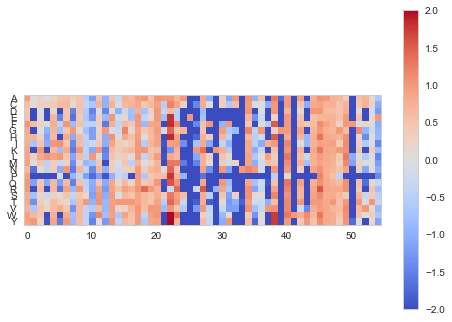

In [7]:
plt.imshow(heatmap, cmap='coolwarm', vmin=-2, vmax=2)
plt.savefig('scan.png', dpi=300)
plt.yticks(np.arange(0, 20), aa)
plt.colorbar()
plt.show()

In [8]:
diffs = np.empty((20, 20))
diffs[:] = np.nan

In [9]:
for i in range(20):
    for j in range(20):
        diffs[i, j] = np.sum((heatmap[i, :] - heatmap[j, :]) ** 2)

In [10]:
for i in range(20):
    diffs[i, i] = 100

In [11]:
aa_min = np.where(diffs==np.min(diffs))

In [12]:
sorted_aa = np.sort(diffs.reshape(1, 400))

In [13]:
aa[0]

'A'

In [14]:
aa[15]

'S'

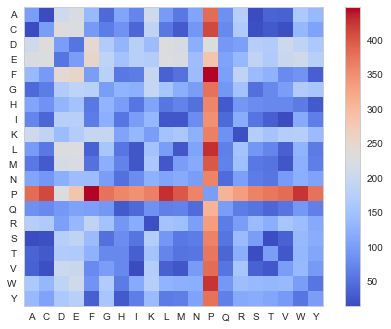

In [15]:
plt.imshow(diffs, cmap='coolwarm')
plt.yticks(np.arange(0, 20), aa)
plt.xticks(np.arange(0, 20), aa)
plt.colorbar()
plt.savefig('scan.png', dpi=300)
plt.show()